# Applied Machine Learning 2nd Assignment

Τhis assignment contains a replication of a study of belief in supernatural evil and attitudes towards guns in the United States. The study is:

Christopher G. Ellison, Benjamin Dowd-Arrow, Amy M. Burdette, Pablo E. Gonzalez, Margaret S. Kelley, Paul Froese, "Peace through superior firepower: Belief in supernatural evil and attitudes toward gun policy in the United States", Social Science Research, Volume 99, 2021, https://doi.org/10.1016/j.ssresearch.2021.102595.

---

> Georgios Liargkovas, Undergraduate Student <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> gliargovas@aueb.gr

## Pre-work

### Import libraries to use

We procceed by importing the libraries used in this assignment. In the 

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Downloading the dataset

* Before attempting to tackle the assignment's questions, the correct dataset utilized in the paper above should be downloaded.


* In sec. 1.4. of the aforementioned paper, it is stated that the data analyzed come from the **Wave Four of the Baylor Religion Survey** (BRS), conducted in January 2014.


* Additionally, the dataset contains some missing values, that are addressed via multiple imputation. The imputation will be conducted after coding the variables.


* By searching for the study on Google, we come accross the survey's website where we are redirected to the ARDA website, to download the dataset. The EXCEL (.xlsx) format is downloaded. The download link can be found [here](https://osf.io/hf9u3/download). 


* An initial attempt for reading the file resulted in a parse error. It turned out that the file contained text formatting that prohibited pandas from reading it correctly. 

We proceed to read the dataset from the .sav file:

In [2]:
data = pd.read_excel("data/Baylor Religion Survey, Wave IV (2014).xlsx")
data

,MOTHERLODE_ID,PROJECT_ID,RESPONDENT_ID,METHOD_ID,METHOD_TYPE,PROJECT_NUMBER,CREATED_ON,PRACTICE,RESPONDENT_DATE,RESPONDENT_LANGUAGE,...,STATE,PROJWT,WEIGHT,Q2,RELTRAD,I_GENDER,I_EDUC,I_MARITAL,I_RELIGION,I_ATTEND
0,128170892,33370,01_000001_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,20086.696606,0.270000,Church of Christ,1.0,2.0,5.0,3.0,1.0,6.0
1,128170893,33370,01_000002_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,26218.573175,0.352423,Church of God In Christ,3.0,2.0,3.0,3.0,3.0,2.0
2,128170894,33370,01_000003_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,ND,41408.889891,0.556608,ELCA,2.0,2.0,3.0,1.0,2.0,6.0
3,128170895,33370,01_000004_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,50023.027356,0.672397,Independent Methodist,2.0,2.0,4.0,3.0,2.0,5.0
4,128170896,33370,01_000005_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,IA,230734.428388,3.101474,Don't have specific name,1.0,1.0,2.0,2.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,33371,02_000301_00000013,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/10/2014,es-AR,...,CA,17054.912661,0.229248,NaN,4.0,2.0,5.0,2.0,4.0,2.0
1568,128172921,33371,02_000326_00000014,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/12/2014,es-AR,...,CA,104454.336796,1.404049,NaN,4.0,2.0,2.0,2.0,4.0,1.0
1569,128172922,33371,02_000351_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,...,CA,153453.642034,2.062685,NaN,6.0,2.0,3.0,1.0,5.0,6.0
1570,128172335,33371,02_000352_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,...,CT,33324.200008,0.447935,Catolica Romana - Latinos,4.0,1.0,5.0,2.0,4.0,3.0


### Q1: Belief in Supernatural Evil Metric

* For this question, we will be examining three variables. To select the correct varuables to use, it was necessary to examine the dataset's labels. Question group 23 contains questions about belief in supernatural forces. From there we can spot the questions that concern us:

 * **Q23A**: whether the respondent believes in the devil.
 * **Q23C**: whether the respondent believes in hell.
 * **Q23G**: whether the respondent believes in demons.
 
 
* Additionally, in the paper, it is described that the use of BRS sample weights help align the responses of the survey to the characteristics of the adult population of the continental United States. 

* However, every analysis performed does not take weights into account, so we won't be using them in our analysis either.

We create a new dataframe containing the answers of the above questions with more descriptive labels:

In [3]:
q1 = data[["Q23A", "Q23C", "Q23G"]]
q1.columns = ["Satan", "Hell", "Demons"]
q1

,Satan,Hell,Demons
0,4.0,4.0,4.0
1,4.0,4.0,4.0
2,3.0,2.0,2.0
3,4.0,4.0,4.0
4,4.0,4.0,4.0
...,...,...,...
1567,4.0,2.0,4.0
1568,3.0,3.0,3.0
1569,4.0,4.0,3.0
1570,3.0,3.0,3.0


* We want to combine the three responses into one single metric.


* We can think of this as a problem of describing three different dimentions (belief in satan, hell and demons) with just one dimention (belief in supernatural evil). 


* This can be done by conducting a **Principal Component Analysis (PCA)**.


* In the above dataframe, the rows represent our samples and the columns represent the different features (belief in satan, hell and demons). So, for each sample, we have three features.


* We are now going to conduct PCA with a signle dimention to the above three questions. PCA requires our data to be free of missing values. We haven't conducted any form of imputation yet, so we are going to conduct PCA by ignoring the missing values.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(q1.dropna())

PCA(n_components=1)

Let's have a look to the explained variance ratio of the PCA:

In [5]:
pca.explained_variance_ratio_

array([0.90171495])

* Principal Component Analysis explains a very large percentage (just above 90%) of the total variance of the three metrics. 
* This means that combining them into a single metric can be done without significant information loss.


* We have seen that the components can be combined together, but how do they combine? 
* For this, we will have to take a look at the PCA components:

In [6]:
pca.components_

array([[-0.58568735, -0.57818501, -0.56804263]])

* So from the above, we can conclude that belief in satan, hell and demons can be combined into a single metric: **Supernatural Evil** (SE). The coefficients of the different beliefs are the following:

$$Supernatural Evil = 0,586 * Satan + 0,578 * Hell + 0,568 * Demons$$

* The coefficients are very close to ane another, which indicates that the authors' approach to combine them into a single metric by calculating their average (the average assumes all variables have the same weight) can adequately describe the relationship between the three metrics and be used to combine them into a single one. 

### Q2: Variables Selection

* Fow this section of the assignment, we need to select and rename the different columns of the dataset in order to make it easier to process.

* We identify the related to the question variables by reading the dataset description.

Below are our variables with their column and their newer encoding (**ans** represents the specific option/s in a question if the question has to be coded into dummy variables):

* Dependent Variables

  * **Q73A**: Ban on Semi-Auto Guns
  * **Q73E**: Ban on High-Capacity Ammo Clips 
  * **Q73G**: Banning Civilian Handguns
  * **Q73H**: Support for Concealed Carry Laws
  * **Q73C**: More Armed Security at Schools
  * **Q73F**: More Teachers/Faculty having Guns
  * **Q73B**: More Gun Safety Programs
  * **Q73D**: Expanded Mental Health Screening
  
* Independept Variables
 
   * Religious Variables
     * **Q4**: Attendance
     * **Q17 (ans: 3,4,8)**: Bible (Human Error, History and Fables) 
     * **Q17 (ans: 2)**: Biblical Inerrancy
     * **Q17 (ans: 1)**: Biblical Literalism
     
  * Religious Affiliation
    * **I_RELIGION (ans: 1)**: Conservative Protestant (Evangelical)
    * **I_RELIGION (ans: 2)**: Mainline Protestant 
    * **I_RELIGION (ans: 3)**: Black Protestant (African Methodist)
    * **I_RELIGION (ans: 4)**: Catholic
    * **I_RELIGION (ans: 5)**: Other (Judaism, Islam, other non-Christian world religion, minority faiths)
    * **I_RELIGION (ans: 6)**: No Affiliation
  * **Q31**: Political Ideology
  * **AGE**: Age
  * Sex
    * **Q77 (ans: 2)**: Female
    * **Q77 (ans: 1)**: Male
  * Race
    * **Q88A** : White
    * **Q89 (ans: 2,3,4)**: Hispanic
    * **Q88B** : African American/Black 
    * **Q88C,Q88D,Q88E,Q88F**: Other
  * Education
    * **Q90 (ans: 1,2)**: Less Than High School 
    * **Q90 (ans: 3)**: High School or Equivalent 
    * **Q90 (ans: 4, 5)**: Some College
    * **Q90 (ans: 6)**: College Degree (contains technical degree)
    * **Q90 (ans: 7)**: Post-graduate Degree 
  * **Q95**: Household Income
  * Marital Status
    * **I_MARITAL (ans: 1,3,4)**: Not Partnered/Single 
    * **I_MARITAL (ans: 2)**: Married/Cohabitating
  * Children
    * **Q92_NONE**: No kids under 18 in home 
    * **Q92**: Kids under 18 in home
  * Area Demographics
    * **Q80 (ans: 3,4)**: Small Town/Rural
    * **Q80 (ans: 1,2)**: Urban Area
  * Region
    * **STATE (ans: MD,DE,VA,WV,KY,TN,NC,SC,FL,GA,AL,MS,LA,AK,TX,OK)**: South
    * **STATE (ans: not belonging in the above)**: Other Region

Now, let's code the variables and create dummy variables where needed.

For this purpose, we create a new DataFrame:

In [7]:
q2 = pd.DataFrame()

* During the whole variable coding process, we must be very careful with NaNs. Every coding approach utilized taked into consieration the missing values and does not alter them, unless described otherwise.


* Firstly, we will code the dependent variables. This can be done very easily with the approach below, which also keeps the missing values intact. 

In [8]:
q2["BAN_SEMI_AUTO"] = 2 - data.Q73A
q2["BAN_AMMO_CLIPS"] = 2 - data.Q73E
q2["BAN_HANDGUNS"] = 2 - data.Q73G
q2["SUPPORT_CONCEALED_CARRY"] = 2 - data.Q73H
q2["ARMED_SECURITY"] = 2 - data.Q73C
q2["ARMED_TEACHERS"] = 2 - data.Q73F
q2["MORE_GUN_SAFETY"] = 2 - data.Q73B
q2["EXPANDED_SCREENING"] = 2 - data.Q73D

* Then, we will proceed with some easy-to-code variables, such as the belief in diffferent supernatural evil powers, the religious attendance, the political ideology and the income of the respondents.

* Note that there are two versions of the religious attendance metric in the variables. The one we chose is the one that ranges from 1-8, which aligns with the one used in the **Appendix A table** (range 1-8).

In [9]:
q2["DEVIL"] = data.Q23A
q2["HELL"] = data.Q23C
q2["DEMONS"] = data.Q23G

q2["ATTENDANCE"] = data.Q4

q2["POLITICAL_IDEOLOGY"] = data.Q31

q2["INCOME"] = data.Q95

* We then proceed with the respondents' beliefs about the bible.
* In this case, "I don't know" answers were mapped as NaN. We will assume that all NaNs are classified as "I don't know", which means that we know the category they belong to and therefore will be mappped as 0, instead of NaN. 
* This approach leads to an identical value in the descriptive statistics section and lead to more identical regression results in q3.


In [10]:
q2["BIBLICAL_LITERALISM"] = np.where(data.Q17 == 1, 1, np.where(data.Q17.isna(), np.NaN, 0))
q2["BIBLICAL_INERRACY"] = np.where(data.Q17 == 2, 1, np.where(data.Q17.isna(), np.NaN, 0))
q2["BIBLE_HUMAN_ERROR"] = np.where((data.Q17 == 3) | 
                                   (data.Q17 == 4) | 
                                   (data.Q17 == 8), 1, np.where(data.Q17.isna(), np.NaN, 0))

* In the respondents' religious affiliation, missing values were left as is. I_RELIGION variable was utilised as it is already coded in the way we want (one category per variable value). 

* For leaving missing values intact the following numpy.where() format was used:


    np.where(question == value, 1, np.where(question.isna(), np.NaN, 0))


* This way, zeros will remain zero and NaNs will remain NaN.

In [11]:
q2["CONSERVATIVE_PROTESTANT"] = np.where((data.I_RELIGION == 1), 1, np.where(data.I_RELIGION.isna(), np.NaN, 0))
q2["MAINLINE_PROTESTANT"] = np.where((data.I_RELIGION == 2), 1, np.where(data.I_RELIGION.isna(), np.NaN, 0))
q2["BLACK_PROTESTANT"] = np.where((data.I_RELIGION == 3), 1, np.where(data.I_RELIGION.isna(), np.NaN, 0))
q2["CATHOLIC"] = np.where((data.I_RELIGION == 4), 1, np.where(data.I_RELIGION.isna(), np.NaN, 0))
q2["OTHER_RELIGION"] = np.where(data.I_RELIGION == 5, 1, np.where(data.I_RELIGION.isna(), np.NaN, 0))
q2["NO_AFFILIATION"] = np.where((data.I_RELIGION == 6), 1, np.where(data.I_RELIGION.isna(), np.NaN, 0))

* A similar approach was used for education level variables, NaNs are left intact:

In [12]:
q2["LESS_THAN_HS"] = np.where((data.Q90 == 1) | (data.Q90 == 2), 1, np.where(data.Q90.isna(), np.NaN, 0))
q2["HIGH_SCHOOL_OR_EQUIVALENT"] = np.where(data.Q90 == 3, 1, np.where(data.Q90.isna(), np.NaN, 0))
q2["SOME_COLLEGE"] = np.where((data.Q90 == 4) | (data.Q90 == 5), 1, np.where(data.Q90.isna(), np.NaN, 0))
q2["COLLEGE_GRADUATE"] = np.where((data.Q90 == 6), 1, np.where(data.Q90.isna(), np.NaN, 0))
q2["POSTGRADUATE"] = np.where((data.Q90 == 7), 1, np.where(data.Q90.isna(), np.NaN, 0))

* Regarding age, it was noticed that 104 responses had a value of 0:

In [13]:
data.AGE.value_counts()

0     104
67     40
59     40
58     39
61     37
     ... 
95      2
99      2
89      2
94      2
96      1
Name: AGE, Length: 80, dtype: int64

* It is obvious that these are missing values so they were replaced by NaN.

In [14]:
q2["AGE"] = np.where(data.AGE > 0, data.AGE, np.NaN)

* Genders were easily mapped to separate variables as seen below:

In [15]:
q2["FEMALE"] = data.Q77 - 1
q2["MALE"] = 2 - data.Q77

* For the marital status, we follow a similar approach as the other dummy variables.

* It was noticed that the downloaded excel file (and the SPSS file as well) **has different values than the one in the [codebook](https://www.thearda.com/Archive/Files/Codebooks/BRS2014_CB.asp) of the dataset**. This might be due to the weights taken into consideration. Our analysis is
* This might be a problem on other questions as well but it is not something we can control.

In [16]:
q2["MARRIED"] = np.where(data.I_MARITAL == 2, 1, np.where(data.I_MARITAL.isna(), np.NaN, 0))
q2["NOT_PARTNERED"] = np.where((data.I_MARITAL == 1) | 
                               (data.I_MARITAL == 3) | 
                               (data.I_MARITAL == 4), 1, np.where(data.I_MARITAL.isna(), np.NaN, 0))
data.I_MARITAL.value_counts()

2.0    859
1.0    309
3.0    254
4.0    132
Name: I_MARITAL, dtype: int64

* Having children under 18 in home was a bit tricky to map as two variables were used (Q93 & Q93_NONE).

* There were cases where only one of the two answers was NaN and cases were both answers were missing.

* The approach was to only take into account answers where at least one of the answers was not missing.
 * If children were more than 0 in Q93, we were sure that the respondent had a child in home. In any other case Q93 can either be 0 or NaN. If either Q93 or Q93_NONE are not NaN we are sure that the respondent does not have children.
 * If Q93_NONE has a value, it means that the respondent does not have a child.
 * If both Q93 and Q93_NONE are NONE, we are sure that the value of both mapped variables will be NaN.

In [17]:
q2["Both_child_na"] = np.where((data.Q93.isna()) & (data.Q93_NONE.isna()), 1, 0)
q2["CHILDREN"] = np.where(data.Q93 > 0, 1, np.where(q2.Both_child_na == 1, np.NaN, 0))
q2["NO_CHILDREN"] = np.where((data.Q93_NONE == 1) | 
                             (data.Q93 == 0), 1, 
                             np.where(q2.Both_child_na == 1, np.NaN, 0))

* Mapping of urban and rural areas was straightforward:

In [18]:
q2["URBAN"] = np.where((data.Q80 == 1)|(data.Q80 == 2),
                1, np.where(data.Q80.isna(), 
                    np.NaN, 0))
q2["RURAL"] = np.where((data.Q80 == 3)|(data.Q80 == 4),
                1, np.where(data.Q80.isna(), 
                    np.NaN, 0))

* To determine whether a respondent resides in a southern region, the **STATE** variable should be analyzed. The south states were selected according to this [Wikipedia article](https://en.wikipedia.org/wiki/Southern_United_States) about the **Southern United States**.
* The states belonging to the american south are the ones below:

In [19]:
south_states = {"MD","DE","VA","WV","KY",
                "TN","NC","SC","FL","GA",
                "AL","MS","LA","AK","TX","OK"}

* We then procceed with the mapping of southern regions:

In [20]:
q2["SOUTH"] = np.where(data.STATE.isin(south_states), 1, 
                np.where(data.STATE.isna(), 
                   np.NaN, 0))
q2["OTHER_REGION"] = np.where(~data.STATE.isin(south_states), 1, 
                        np.where(data.STATE.isna(), 
                           np.NaN, 0))

* Finally, the race of the respondents must be coded to different dummy variables.

* For the coding, Q88A-F & Q89 were examined.

* Mapping was tricky as a separate variable was used for respondents of hispanic origin.

* In addition, some answers to Q88 had only one race set to 1 and the other ones as NaN, while others, had the other races set to 2 (negative).

* There were also cases where no race was not NaN but set to 2 (negative) in some occations (this specific case is considered to be "Other Race", more detailed description below)

* We must first fill in some NaNs that should not be missing. If at least one race is selected in columns Q88A to Q88F, then all other answers can be set to 0 if not already set. 


* The issue described above can be seen in row 1 below:

In [21]:
race_qs = ["Q88A",'Q88B', 'Q88C', 'Q88D', 'Q88E', 'Q88F']
data[race_qs].head()

,Q88A,Q88B,Q88C,Q88D,Q88E,Q88F
0,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,2.0,2.0,2.0,NaN
2,1.0,2.0,2.0,2.0,2.0,2.0
3,1.0,2.0,2.0,2.0,2.0,2.0
4,1.0,2.0,2.0,2.0,2.0,2.0


* This issue is fixed with the code below:

In [22]:
all_races_na = (12 - data.fillna(2)[race_qs].sum(axis=1)) > 0

race = pd.DataFrame(data[race_qs].copy().values)
race.columns = race_qs

for row in range(len(race.values)):
    if all_races_na.loc[row]:
        for column in range(6):
            if math.isnan(race.loc[row][column]):
                race.loc[row][column] = 2           
for row in range(len(race.values)):
    if all_races_na.loc[row]:
        for column in range(6):
            if math.isnan(race.loc[row][column]):
                race.loc[row][column] = 2
race.head()

,Q88A,Q88B,Q88C,Q88D,Q88E,Q88F
0,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,1.0,2.0,2.0,2.0,2.0
2,1.0,2.0,2.0,2.0,2.0,2.0
3,1.0,2.0,2.0,2.0,2.0,2.0
4,1.0,2.0,2.0,2.0,2.0,2.0


* The issue in row 1 has been fixed.


* We then take into account Q89 as well. We create a series to spot the cases where neither of the questions described above were answered.

* We then code each answer to the related dummy variable.
* In case of NaN in any of the qustions, the if both Q88A-F and Q89 are NaN, then NaN is assigned to all the bummy vaiables, otherwise 0 (negative) is assigned.

In [23]:
# Neither hispanic and other races are all NaN
RaceNaN = race[race_qs].isna().all(axis=1) & data.Q89.isna()

q2["OTHER_RACE"] = np.where((race.Q88C == 1) |(race.Q88D == 1) |(race.Q88E == 1) |(race.Q88F == 1), 1, 
                       np.where(RaceNaN, np.NaN, 0))
q2["BLACK_AFRICAN_AMERICAN"] = np.where((race.Q88B == 1), 1, np.where(RaceNaN, np.NaN, 0))
q2["WHITE"] = np.where((race.Q88A == 1), 1, np.where(RaceNaN, np.NaN, 0))
q2["HISPANIC"] = np.where((data.Q89 > 1), 1, np.where(RaceNaN, np.NaN, 0))

race_columns = ["WHITE", "BLACK_AFRICAN_AMERICAN", "HISPANIC", "OTHER_RACE"]
q2[race_columns].head()

,WHITE,BLACK_AFRICAN_AMERICAN,HISPANIC,OTHER_RACE
0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0


* The coding process of the respondents' race is not finished yet. In some cases, we can notice that a respondent has selected more than one race (row 32 below):

In [24]:
q2[race_columns].iloc[31:34]

,WHITE,BLACK_AFRICAN_AMERICAN,HISPANIC,OTHER_RACE
31,1.0,0.0,0.0,0.0
32,1.0,0.0,1.0,1.0
33,1.0,0.0,0.0,0.0


* From the paper's descriptive statisctics we can cocnclude that the paper is based on the assumption that each respondent has only one race.

* So if multiple races are positive, only one should be selected.

* The order of precedence used is the following:


    HISPANIC > OTHER_RACE > BLACK_AFRICAN_AMERICAN > WHITE


* This means that if a respondent selected all the races, they will be classified as HISPANIC.


* This is what we do below:

In [25]:
q2["WHITE"] = np.where(q2.WHITE != 1, 
                      q2.WHITE, 
                      q2.WHITE - np.where(q2[["BLACK_AFRICAN_AMERICAN","OTHER_RACE","HISPANIC"]].sum(axis=1) > 0, 1, 0))
q2["BLACK_AFRICAN_AMERICAN"] = np.where(q2.BLACK_AFRICAN_AMERICAN != 1, 
                      q2.BLACK_AFRICAN_AMERICAN, 
                      q2.BLACK_AFRICAN_AMERICAN - np.where(q2[["OTHER_RACE","HISPANIC"]].sum(axis=1) > 0, 1, 0))
q2["OTHER_RACE"] = np.where(q2.OTHER_RACE != 1, 
                         q2.OTHER_RACE,
                         q2.OTHER_RACE - q2.HISPANIC)
q2[race_columns].iloc[31:34]

,WHITE,BLACK_AFRICAN_AMERICAN,HISPANIC,OTHER_RACE
31,1.0,0.0,0.0,0.0
32,0.0,0.0,1.0,0.0
33,1.0,0.0,0.0,0.0


* We are now left with the where someone answered as negative in every race. We assume that there cases will be classified as other race, as they have answered at least one race related question.

In [26]:
empty_race = np.where((q2[race_columns] == 0).all(axis=1), 1, np.where(RaceNaN, np.NaN, 0))

q2["OTHER_RACE"] = q2["OTHER_RACE"] + empty_race
q2[race_columns]

,WHITE,BLACK_AFRICAN_AMERICAN,HISPANIC,OTHER_RACE
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
1567,0.0,0.0,1.0,0.0
1568,0.0,0.0,1.0,0.0
1569,0.0,0.0,1.0,0.0
1570,0.0,0.0,1.0,0.0


We are now going to specify the columns that contain our variables, in order to display their means:

* We finally calculate the SUPERNATURAL_EVIL metric

In [27]:
q2["SUPERNATURAL_EVIL"] = ((q2.DEVIL + q2.HELL + q2.DEMONS) /3).round()
q2["SUPERNATURAL_EVIL"]

0       4.0
1       4.0
2       2.0
3       4.0
4       4.0
       ... 
1567    3.0
1568    3.0
1569    4.0
1570    3.0
1571    NaN
Name: SUPERNATURAL_EVIL, Length: 1572, dtype: float64

In [28]:
all_cols = ["BAN_SEMI_AUTO", "BAN_AMMO_CLIPS", "BAN_HANDGUNS", "SUPPORT_CONCEALED_CARRY", "ARMED_SECURITY","ARMED_TEACHERS",
    "MORE_GUN_SAFETY", "EXPANDED_SCREENING", "SUPERNATURAL_EVIL", "ATTENDANCE", "BIBLICAL_LITERALISM", 
    "BIBLICAL_INERRACY", "BIBLE_HUMAN_ERROR", "CONSERVATIVE_PROTESTANT", "MAINLINE_PROTESTANT", "BLACK_PROTESTANT", "CATHOLIC", 
    "OTHER_RELIGION", "NO_AFFILIATION", "POLITICAL_IDEOLOGY","AGE",
    "MALE", "FEMALE","WHITE", "HISPANIC","BLACK_AFRICAN_AMERICAN","OTHER_RACE",
    "LESS_THAN_HS","HIGH_SCHOOL_OR_EQUIVALENT", "SOME_COLLEGE","COLLEGE_GRADUATE",
    "POSTGRADUATE","INCOME","MARRIED", "NOT_PARTNERED","CHILDREN", "NO_CHILDREN" ,"URBAN", "RURAL",
    "SOUTH", "OTHER_REGION", "DEVIL", "HELL", "DEMONS"]

* We then proceed to calculate the means of every column before imputation:

In [29]:
means = pd.DataFrame(q2[all_cols].mean().transpose())
means.columns = ["Mean Before Imputation"]

* We then proceed with the imputation.
* For the imputation we will be using scikit learn's IterativeImputer, which is the equivalent of the multiple imputation used in the paper. We initialize and transform our data.


* Note that we will be rounding our results as the iterative imputation returns float values.


* There is a risk of imputing two or more dummy variables as 1. This in practice is extremely rare and will therefore not be concerning us. The iterative imputer takes into account the relationships between the columns and therefore is is more difficult for such collisions to occure.
* In addition, as described by [Johnson & Young 2011](https://www.sciencedirect.com/science/article/pii/S0049089X21000727?via=ihub#bib32) iterative imputation can be used effectively for imputing dummy variables.

In [30]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=0)
q2[all_cols] = imp.fit_transform(q2[all_cols])
q2[all_cols] = q2[all_cols].round()
q2[all_cols]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,BAN_SEMI_AUTO,BAN_AMMO_CLIPS,BAN_HANDGUNS,SUPPORT_CONCEALED_CARRY,ARMED_SECURITY,ARMED_TEACHERS,MORE_GUN_SAFETY,EXPANDED_SCREENING,SUPERNATURAL_EVIL,ATTENDANCE,...,NOT_PARTNERED,CHILDREN,NO_CHILDREN,URBAN,RURAL,SOUTH,OTHER_REGION,DEVIL,HELL,DEMONS
0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,4.0,8.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,4.0,4.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,4.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,4.0,4.0,4.0
2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,7.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0,2.0,2.0
3,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,4.0,6.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,4.0,4.0
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0,8.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,3.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,2.0,4.0
1568,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.0,3.0,3.0
1569,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,7.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,4.0,3.0
1570,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,3.0


* We calculate the means after imputation and print them below:

In [31]:
means["Mean After Imputation"] = pd.DataFrame(q2[all_cols].mean().transpose())
means

,Mean Before Imputation,Mean After Imputation
BAN_SEMI_AUTO,0.629161,0.637405
BAN_AMMO_CLIPS,0.671105,0.680025
BAN_HANDGUNS,0.290473,0.288168
SUPPORT_CONCEALED_CARRY,0.557923,0.557888
ARMED_SECURITY,0.621854,0.632316
ARMED_TEACHERS,0.294548,0.287532
MORE_GUN_SAFETY,0.927393,0.930025
EXPANDED_SCREENING,0.908069,0.911578
SUPERNATURAL_EVIL,3.090909,3.091603
ATTENDANCE,3.676735,3.674936


We can see that all the results are almost identical with the paper's descriptive statistics, except for the children variable. However, the error is less almost 3 percentage units and which is not that large and therefore we can proceed to the next questions.


### Q3: Predict Support for Various Gun Policies

* Firstly, we create come column groups to aid us create the statsmodels regression formulae.

In [32]:
focal_var_col = ["SUPERNATURAL_EVIL"]

dependent_variable_cols = ["BAN_SEMI_AUTO","BAN_AMMO_CLIPS" ,"BAN_HANDGUNS",
"SUPPORT_CONCEALED_CARRY","ARMED_SECURITY","ARMED_TEACHERS",
"MORE_GUN_SAFETY","EXPANDED_SCREENING"]

mediator_col = ["POLITICAL_IDEOLOGY"]

religious_variable_cols = ["ATTENDANCE", "BIBLICAL_INERRACY", "BIBLICAL_LITERALISM", 
                             "MAINLINE_PROTESTANT", "BLACK_PROTESTANT", "CONSERVATIVE_PROTESTANT",  
                             "CATHOLIC", "OTHER_RELIGION"]

control_cols = ["BLACK_AFRICAN_AMERICAN", "HISPANIC", "OTHER_RACE", "FEMALE",
                "LESS_THAN_HS", "SOME_COLLEGE","COLLEGE_GRADUATE", "POSTGRADUATE",
                "AGE", "INCOME", "MARRIED", "CHILDREN", "URBAN", "SOUTH"]

* We then proceed with the regression.


* Two models were run:
 * One containing only the focal variable and the religious variables (**model_a**)
 * One containing all the variables (focal + religious + mediator + control) (**model_b**)


* Because of the dummy variables, a logistic regression model was run instead of a linear regression model. This is done with the **logit** function.


* The logistic regression coefficients are difficult to interpret, therefore in the paper the **Odds Ratio** (**OR**) was calculated. This is done by getting the exponentiating the logistic regression coefficients.

* The Odds Ratio describes the single unit increment association between the measured variable and the odds of the dependent variable being 1 or 0. The farther the OR from 1 the larger the magnitude of the association.

* For instance for the first two regression models for BAN_SEMI_AUTO, or for supernatural evil is $0,76, p<0.001$ (compared to the paper's $0,73, p<0,001$). This means that an increase of a single unit in one's belief about supernatural evil, reduces the chance of one supporting the ban in semi auto guns by $|1-0,76| = 0,24\%$. This effect is reduced to $|1-0,86| = 14\%$ ($OR=0,86$) when the mediator variable of political ideology and the control variables are taken into consideration.


* Below 8 tables containing the Odds Ratios and the significance (p-value) for each dependent variable for logistic regression models (a) and (b) can be found.

In [33]:
from statsmodels.formula.api import logit

print("=====================================================================")
print("                           Logistic Regression                       ")
print("=====================================================================", end="\n\n\n")

for col in dependent_variable_cols:
    
    religious_columns_formula = col + " ~ " + '+'.join(focal_var_col + religious_variable_cols)
    all_columns_formula = col + " ~ " + '+'.join(focal_var_col + religious_variable_cols + mediator_col + control_cols)

    model_a = logit(formula=religious_columns_formula, data=q2[all_cols])
    model_b = logit(formula=all_columns_formula, data=q2[all_cols])
    
    res_a = model_a.fit(disp=0)
    res_b = model_b.fit(disp=0)
    
    print("---------------------------------------------------------------------")
    print("Independent Variable: ", col)
    print("---------------------------------------------------------------------")
    
    summary = pd.DataFrame()
    summary.index = res_b.params.index
    summary["OR_a"] = np.exp(res_a.params).round(2)
    summary["pval_a"] = res_a.pvalues.round(3)
    summary["sig_a"] = np.where(summary["pval_a"] < 0.001, "***", 
                                     np.where(summary["pval_a"] < 0.01, "**", 
                                             np.where(summary["pval_a"] < 0.05, "*", "")))
    
    summary["OR_b"] = np.exp(res_b.params).round(2)
    summary["pval_b"] = res_b.pvalues.round(3)
    summary["sig_b"] = np.where(summary["pval_b"] < 0.001, "***", 
                                     np.where(summary["pval_b"] < 0.01, "**", 
                                             np.where(summary["pval_b"] < 0.05, "*", "")))
    print(summary, end="\n\n")

                           Logistic Regression                       


---------------------------------------------------------------------
Independent Variable:  BAN_SEMI_AUTO
---------------------------------------------------------------------
                         OR_a  pval_a sig_a  OR_b  pval_b sig_b
Intercept                3.06   0.000   ***  0.02   0.000   ***
SUPERNATURAL_EVIL        0.76   0.000   ***  0.86   0.066      
ATTENDANCE               1.04   0.089        1.06   0.038     *
BIBLICAL_INERRACY        0.92   0.598        0.98   0.897      
BIBLICAL_LITERALISM      0.94   0.738        1.11   0.602      
MAINLINE_PROTESTANT      1.20   0.366        1.20   0.431      
BLACK_PROTESTANT         1.80   0.035     *  0.85   0.686      
CONSERVATIVE_PROTESTANT  0.99   0.973        1.43   0.136      
CATHOLIC                 1.35   0.110        1.44   0.096      
OTHER_RELIGION           1.95   0.010     *  1.64   0.091      
POLITICAL_IDEOLOGY        NaN     NaN        1.

---------------------------------------------------------------------
Independent Variable:  ARMED_TEACHERS
---------------------------------------------------------------------
                         OR_a  pval_a sig_a  OR_b  pval_b sig_b
Intercept                0.18   0.000   ***  6.09   0.000   ***
SUPERNATURAL_EVIL        1.36   0.000   ***  1.24   0.014     *
ATTENDANCE               0.95   0.058        0.93   0.012     *
BIBLICAL_INERRACY        0.97   0.827        0.91   0.581      
BIBLICAL_LITERALISM      0.98   0.901        0.84   0.416      
MAINLINE_PROTESTANT      1.00   0.996        0.96   0.866      
BLACK_PROTESTANT         0.56   0.060        1.28   0.561      
CONSERVATIVE_PROTESTANT  1.49   0.071        1.22   0.395      
CATHOLIC                 0.83   0.357        0.76   0.214      
OTHER_RELIGION           0.76   0.321        0.88   0.663      
POLITICAL_IDEOLOGY        NaN     NaN        0.66   0.000   ***
BLACK_AFRICAN_AMERICAN    NaN     NaN        0.54   0.

The results are very similar to the ones presented in tables 1 and 2 of the paper. Throughout the analyses, the factor of supernatural evil is found to be statistically significant (pvalue < 0,05), which means that it is highly unlikely that if the model is rerun with different sampling the odds ratio will differ.

The only cases where the Supernatural Evil variable OR is not significant, is on the "MORE_GUN_SAFETY" dependent variable. Also, models containing the mediator and control variables, reduce the significance and the magnitude of the supernatural evil variable, which is an expected behaviour. For measures such as handgun bans ($OR=0.65$), support of concealed weapon carry ($OR=1.54$) and armed school security ($OR=1.61$) the effect of supernarural evil is noticeably larger ($OR>1$ means support and $OR<1$ means opposition of the examined measure).

Any minor differences in the Odds Ratios and the significance of the different parameters for every model are expected, as both minor differences in the dataset as well as in the imputation and coding methods utilized do exist.

Throughout the analyses, there seems to be a notewothy positive relationship between the belief in supernatural evil and the support of gun use.

Another significant factor with a strong relationship between the use of guns is the political ideologies of the respondents. More liberal ideologies (value close to 7) tend to oppose the use of firearms, whereas conservative ones (value close to 1) tend to support them. For instance the odds ratio in model b for political ideology is 1.75, which means that an incremental increase in the political ideology value (range 1-7), increases the chance of one supporting a semi-auto weapon ban by $|1 - 1,75| = 75\%$.

The effect of political ideology is found to be statistically significant in every model run and its magnitude is noticeably larger than the one of belief in supernatural evil.

Additionally, the gender plays a very important role regarding the support of firearm use. In the first model run, the gender has an odds ratio of 3.2, which means that is the respondent identifies as a female, the chance of them supporting a ban in semi automatic guns increases by $|1-3,2| = 220\%$. The gender is found to be statistically significant in all but one of the models run.

Moreover, racial characteristics and gun support seem to have an opposite relationship, although not always significant and therefore cannot safely conclude to the above.

Finally the age of the respondent seems to be a significant factor that affects the odds of one supporting gun use. The OR in every case is close to 1 because of the many different possible values of the variable (range $19-99$). Despite close to 1 the relationship between age and gun use is always negative, which means the older the respondent, the less likely they are to support guns. This relationship is particularly intense ($OR=1,03$) when the semi auto gun and the high capacity ammo clips bans are concerned (positive relationship between age and ban support).

---

Regarding the article of the Economist, some possible errors can be found:

1. "A Catholic who believes in supernatural evil is more likely to hold pro-gun views than a Protestant who does not believe that Satan is corrupting souls, and vice versa."

There are cases where the race is also a strong predictor of the respondents' views regarding gun use. For instance, black protestants have an OR of 1.8 ($|1 - 1.8| = 80\%$ increased likehood of supporting the ban) when examining the semi-auto weapons ban. In general black protestants and other religious affiliations have a negative attitude towards gun use, that is usually statistically significant as well. Therefore although the effect of supernatural evil might be greater than a person's religion, this is not always clear, and therefore the above argument may sometimes be untrue. 

In addition, religious affiliation variables and especially Protestants and Catholics do not yield any statistically significant result and therefore it is not safe to be used in the example quoted above.


2. "The effect of belief in supernatural evil on support for the right to carry concealed guns was roughly the same as having conservative politics or not possessing a college degree, but smaller than the effect of gender."

The effect of political views (and not specifically conservative politics) is much greater than the belief in suernatural evil when opinions about gun use are concerned. In a wider range, political opinion has an OR that is farther away from 1 compared to supernatural evil, which is also statistically significant. In addition, the wider range compared to the belief in supernatural evil, leaves room for a larger effect of the political views variable.

The same is true for the gender. Although is is usually found to be well above 2, gender can only be incremented once, compared to the supernatural evil and political views variables. As a result, the cumulative percentage changes from a change in a variable with a wider range, may have a greater effect in the end, compared to the respondents' gender. This does not mean that the gender does not play any role, but certainly is not the only factor with such large efferct.

For instance, age has an OR of 1,03 for the semi auto ban, which can have a very significant effect regarding the support of guns of two people of large age difference were examined (3% increase per year increase), compared to the gender (220% if the respondent is female). Gender has a larger OR, but a large age difference (e.g: 60 years) may have a greater effect.


Also, in the paper, the **standardized coefficients** that this conclusion was based upon, **are not in fact standardized** (more details in q4). In order to obtain standardized coefficients, the variables if the linear model must also be standardized. Therefore some could argue that the results are not perfectly valid.


### Q4: Additional Estimations of the Strength of Predictors

* In order to perform standardized regression, we must use standardied coefficients as pointed out in the following [Wikipedia article](https://en.wikipedia.org/wiki/Standardized_coefficient). Specifically it is mentioned that: "A regression carried out on standardized variables produces standardized coefficients".

* Therefore, we will be using standardized variables.

* We can easily standardize our variables with the help of scikit learn's Standard Scanler.

* We will put our standardized variables to a new DataFrame: 

In [34]:
from sklearn.preprocessing import StandardScaler

q4 = pd.DataFrame()

scaler = StandardScaler()

q4[all_cols] = scaler.fit_transform(q2[all_cols])
q4

,BAN_SEMI_AUTO,BAN_AMMO_CLIPS,BAN_HANDGUNS,SUPPORT_CONCEALED_CARRY,ARMED_SECURITY,ARMED_TEACHERS,MORE_GUN_SAFETY,EXPANDED_SCREENING,SUPERNATURAL_EVIL,ATTENDANCE,...,NOT_PARTNERED,CHILDREN,NO_CHILDREN,URBAN,RURAL,SOUTH,OTHER_REGION,DEVIL,HELL,DEMONS
0,-1.325856,-1.457823,-0.636259,0.89021,0.762554,1.574127,0.274298,0.311447,0.856370,1.480778,...,1.12333,-0.584206,0.583227,-1.049573,1.080868,1.283146,-1.283146,0.789139,0.835782,0.897990
1,0.754230,0.685954,-0.636259,0.89021,0.762554,-0.635273,0.274298,0.311447,0.856370,-0.915822,...,1.12333,1.711724,-1.714599,0.952768,-0.925182,1.283146,-1.283146,0.789139,0.835782,0.897990
2,0.754230,0.685954,-0.636259,-1.12333,0.762554,-0.635273,0.274298,0.311447,-1.029083,1.138407,...,1.12333,-0.584206,0.583227,-1.049573,1.080868,-0.779334,0.779334,-0.128410,-0.990276,-0.940083
3,0.754230,0.685954,1.571687,-1.12333,0.762554,-0.635273,0.274298,0.311447,0.856370,0.796035,...,1.12333,-0.584206,0.583227,0.952768,-0.925182,1.283146,-1.283146,0.789139,0.835782,0.897990
4,0.754230,0.685954,1.571687,-1.12333,0.762554,1.574127,0.274298,0.311447,0.856370,1.480778,...,-0.89021,1.711724,-1.714599,0.952768,-0.925182,-0.779334,0.779334,0.789139,0.835782,0.897990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.754230,0.685954,1.571687,-1.12333,0.762554,-0.635273,0.274298,0.311447,-0.086357,-0.915822,...,-0.89021,-0.584206,0.583227,-1.049573,1.080868,-0.779334,0.779334,0.789139,-0.990276,0.897990
1568,0.754230,-1.457823,1.571687,-1.12333,-1.311382,-0.635273,0.274298,0.311447,-0.086357,-1.258193,...,-0.89021,1.711724,-1.714599,0.952768,-0.925182,-0.779334,0.779334,-0.128410,-0.077247,-0.021047
1569,0.754230,0.685954,1.571687,-1.12333,-1.311382,-0.635273,0.274298,0.311447,0.856370,1.138407,...,1.12333,-0.584206,0.583227,-1.049573,1.080868,-0.779334,0.779334,0.789139,0.835782,-0.021047
1570,0.754230,0.685954,1.571687,-1.12333,-1.311382,-0.635273,0.274298,0.311447,-0.086357,-0.231079,...,-0.89021,-0.584206,0.583227,0.952768,-0.925182,-0.779334,0.779334,-0.128410,-0.077247,-0.021047


We will then run traditional linear regression on our data

* Two models were run:
 * One containing only the focal variable and the religious variables (**model_a**)
 * One containing all the variables (focal + religious + mediator + control) (**model_b**)

* The linear regression model with standardized coefficients is considered to be easier to interpret.

* After running the regression models (a) and (b) for each of the independent variables, we get the following results:

In [35]:
from statsmodels.formula.api import ols

print("=====================================================================")
print("                           Standardized OLS                          ")
print("=====================================================================", end="\n\n\n")

for col in dependent_variable_cols:
    
    religious_columns_formula = col + " ~ " + '+'.join(focal_var_col + religious_variable_cols)
    all_columns_formula = col + " ~ " + '+'.join(focal_var_col + religious_variable_cols + mediator_col + control_cols)
    
    model_a = ols(formula=religious_columns_formula, data=q4)
    model_b = ols(formula=all_columns_formula, data=q4)
    
    res_a = model_a.fit(disp=0)
    res_b = model_b.fit(disp=0)
    
    print("---------------------------------------------------------------------")
    print("Independent Variable: ", col)
    print("---------------------------------------------------------------------")
    
    summary = pd.DataFrame()
    summary.index = res_b.params.index
    summary["coeff_a"] = res_a.params.round(3)
    summary["pval_a"] = res_a.pvalues.round(3)
    summary["sig_a"] = np.where(summary["pval_a"] < 0.001, "***", 
                                     np.where(summary["pval_a"] < 0.01, "**", 
                                             np.where(summary["pval_a"] < 0.05, "*", "")))
    
    summary["coeff_b"] = res_b.params.round(3)
    summary["pval_b"] = res_b.pvalues.round(3)
    summary["sig_b"] = np.where(summary["pval_b"] < 0.001, "***", 
                                     np.where(summary["pval_b"] < 0.01, "**", 
                                             np.where(summary["pval_b"] < 0.05, "*", "")))
    print(summary, end="\n\n")


                           Standardized OLS                          


---------------------------------------------------------------------
Independent Variable:  BAN_SEMI_AUTO
---------------------------------------------------------------------
                         coeff_a  pval_a sig_a  coeff_b  pval_b sig_b
Intercept                 -0.000   1.000         -0.000   1.000      
SUPERNATURAL_EVIL         -0.130   0.000   ***   -0.051   0.118      
ATTENDANCE                 0.058   0.086          0.063   0.043     *
BIBLICAL_INERRACY         -0.018   0.579         -0.004   0.881      
BIBLICAL_LITERALISM       -0.013   0.715          0.018   0.595      
MAINLINE_PROTESTANT        0.029   0.390          0.021   0.508      
BLACK_PROTESTANT           0.067   0.036     *   -0.014   0.695      
CONSERVATIVE_PROTESTANT   -0.007   0.877          0.046   0.250      
CATHOLIC                   0.059   0.120          0.052   0.138      
OTHER_RELIGION             0.074   0.012     *    0

---------------------------------------------------------------------
Independent Variable:  ARMED_SECURITY
---------------------------------------------------------------------
                         coeff_a  pval_a sig_a  coeff_b  pval_b sig_b
Intercept                 -0.000   1.000         -0.000   1.000      
SUPERNATURAL_EVIL          0.244   0.000   ***    0.157   0.000   ***
ATTENDANCE                -0.100   0.002    **   -0.091   0.005    **
BIBLICAL_INERRACY          0.025   0.440          0.008   0.792      
BIBLICAL_LITERALISM        0.112   0.001    **    0.057   0.101      
MAINLINE_PROTESTANT        0.048   0.146          0.063   0.053      
BLACK_PROTESTANT           0.059   0.058          0.048   0.202      
CONSERVATIVE_PROTESTANT    0.058   0.174          0.037   0.374      
CATHOLIC                   0.040   0.268          0.048   0.188      
OTHER_RELIGION             0.028   0.333          0.058   0.041     *
POLITICAL_IDEOLOGY           NaN     NaN         -0.

In addition, the same linear regression models were run with unstandardized inputs to compare the results:

In [36]:
print("=====================================================================")
print("                          Unstandardized OLS                         ")
print("=====================================================================", end="\n\n\n")

for col in dependent_variable_cols:
    
    religious_columns_formula = col + " ~ " + '+'.join(focal_var_col + religious_variable_cols)
    all_columns_formula = col + " ~ " + '+'.join(focal_var_col + religious_variable_cols + mediator_col + control_cols)
    
    model_a = ols(formula=religious_columns_formula, data=q2)
    model_b = ols(formula=all_columns_formula, data=q2)
    
    res_a = model_a.fit(disp=0)
    res_b = model_b.fit(disp=0)
    
    print("---------------------------------------------------------------------")
    print("Independent Variable: ", col)
    print("---------------------------------------------------------------------")
    
    summary = pd.DataFrame()
    summary.index = res_b.params.index
    summary["coeff_a"] = res_a.params.round(3)
    summary["pval_a"] = res_a.pvalues.round(3)
    summary["sig_a"] = np.where(summary["pval_a"] < 0.001, "***", 
                                     np.where(summary["pval_a"] < 0.01, "**", 
                                             np.where(summary["pval_a"] < 0.05, "*", "")))
    
    summary["coeff_b"] = res_b.params.round(3)
    summary["pval_b"] = res_b.pvalues.round(3)
    summary["sig_b"] = np.where(summary["pval_b"] < 0.001, "***", 
                                     np.where(summary["pval_b"] < 0.01, "**", 
                                             np.where(summary["pval_b"] < 0.05, "*", "")))
    print(summary, end="\n\n")

                          Unstandardized OLS                         


---------------------------------------------------------------------
Independent Variable:  BAN_SEMI_AUTO
---------------------------------------------------------------------
                         coeff_a  pval_a sig_a  coeff_b  pval_b sig_b
Intercept                  0.756   0.000   ***   -0.179   0.039     *
SUPERNATURAL_EVIL         -0.059   0.000   ***   -0.023   0.118      
ATTENDANCE                 0.010   0.086          0.010   0.043     *
BIBLICAL_INERRACY         -0.019   0.579         -0.005   0.881      
BIBLICAL_LITERALISM       -0.015   0.715          0.020   0.595      
MAINLINE_PROTESTANT        0.039   0.390          0.027   0.508      
BLACK_PROTESTANT           0.129   0.036     *   -0.027   0.695      
CONSERVATIVE_PROTESTANT   -0.007   0.877          0.050   0.250      
CATHOLIC                   0.066   0.120          0.059   0.138      
OTHER_RELIGION             0.134   0.012     *    0

---------------------------------------------------------------------
Independent Variable:  ARMED_SECURITY
---------------------------------------------------------------------
                         coeff_a  pval_a sig_a  coeff_b  pval_b sig_b
Intercept                  0.264   0.000   ***    0.844   0.000   ***
SUPERNATURAL_EVIL          0.111   0.000   ***    0.072   0.000   ***
ATTENDANCE                -0.016   0.002    **   -0.015   0.005    **
BIBLICAL_INERRACY          0.025   0.440          0.008   0.792      
BIBLICAL_LITERALISM        0.129   0.001    **    0.066   0.101      
MAINLINE_PROTESTANT        0.063   0.146          0.084   0.053      
BLACK_PROTESTANT           0.114   0.058          0.093   0.202      
CONSERVATIVE_PROTESTANT    0.063   0.174          0.040   0.374      
CATHOLIC                   0.046   0.268          0.055   0.188      
OTHER_RELIGION             0.050   0.333          0.105   0.041     *
POLITICAL_IDEOLOGY           NaN     NaN         -0.

The standardized coefficients allow us to compare more easily the effect of different predictors, as they are all examined in the same scale.

Contrary to the paper's results, regarding concealed carry, although the effect of gender ($-0.15$) and the effect of college degree ($0.5$) were found to be similar to the paper, the effect of supernatural evil ($0.15$) was similar to the effect of gender , while political ideology was found to have a way larger effect ($0.26$).

However, we notice that the unstandardized coefficients in fact yield the results described in the paper. That is, for concealed carry, the effect of supernatural evil ($0.07$) is indeed roughly the same as the effect of having a college degree ($0.05$) and political ideology ($0.085$), while the effect of gender is far more important ($-0.15$). 

Without the use of standardized coefficients, we cannot be sure about the real effect of each variable, as the variables compared do not have the same scale. Therefore, the standardized coefficients lead to much safer conclusions about the relationship of the variables.

Having a look to the the standardized coefficients again, a different picture exists while examining different independent variables. Regarding the semi auto ban, the effect of supernatural evil ($0.05$) is significantly smaller than the effect of gender ($0.22$). Political ideology still remains the factor with the largest effect ($0.32$). We should note that the effect of age is also significant ($0.17$).

While examining the rest of the standardized coefficient models, a similar picture exists: 
* The effect of political ideology is always the one with the largest effect.
* Gender is usually more important than belief in supernatural evil when determining the attitude towards gun use.
* Having a college degree is plays a less important role compared to the above variables.
* The effect of age is also important and especially regarding the ban of semi-auto guns and high capacity ammi clips plays a much heavier role than supernatural evil. In the other models age remains an important factor but has a smaller magnitude compared to the belief in supernatural evil.

Therefore, we can conclude that despite the fact that belief in supernatural evil may be a strong predictor regarding pro-gun beliefs, political ideology, gender and sometimes the effect of age have a larger effect in determining one's attitude towards guns. The effect of college degrees remains important but is less intense.


### Q5: Compare with Decision Trees / Random Forest Estimators


For the analysis that follows, we need to select the columns used in the decision threes. These include the variables used in the analysis of q2 and q3 but also the dummy variables not included in the regression:

In [37]:
feature_cols = ["SUPERNATURAL_EVIL", "ATTENDANCE", "BIBLICAL_LITERALISM", 
    "BIBLICAL_INERRACY", "BIBLE_HUMAN_ERROR", "CONSERVATIVE_PROTESTANT", "MAINLINE_PROTESTANT", "BLACK_PROTESTANT", "CATHOLIC", 
    "OTHER_RELIGION", "NO_AFFILIATION", "POLITICAL_IDEOLOGY","AGE",
    "MALE", "FEMALE","WHITE", "HISPANIC","BLACK_AFRICAN_AMERICAN","OTHER_RACE",
    "LESS_THAN_HS","HIGH_SCHOOL_OR_EQUIVALENT", "SOME_COLLEGE","COLLEGE_GRADUATE",
    "POSTGRADUATE","INCOME","MARRIED", "NOT_PARTNERED","CHILDREN", "NO_CHILDREN" ,"URBAN", "RURAL",
    "SOUTH", "OTHER_REGION"]

* Firstly, we need to determine the best tree to use for our analysis. This will be done by comparing the following classifiers:
 1. DecisionTreeClassifier (simple decision tree)
 2. BaggingClassifier on the DecisionTreeClassifier (bagging for the simple decision tree)
 3. RandomForestClassifier (random forests)
 4. BaggingClassifier on the RandomForestClassifier (bagging for the random forests)
 5. ExtraTreesClassifier (extremely randomized trees)
 6. AdaBoostClassifier on the DecisionTreeClassifier (boosting on the simple decision tree)
 7. XGBoostClassifier
 8. LightGBMClassifier
 
 
* For running all the models, some assumptions had to be made and some parameters have to be kept the same:
 * Random state is set to 0 in all models
 * Where applicable, entropy was selected as the preferred criterion as it yielded more accurate results
 * All the trees were set to have a maximum depth of 5. This prevented overfitting and led to significantly improved results.
 * We assume that the accuracy determines how well a decision tree performs. It will be used to measure the performance of every decision tree model examined. MORE_GUN_SAFETY and EXPANDED_SCREENING variables have very high percentage of positives (1) therefore accuracy may not be the best metric to use. However, this effect is mediated from the other six variables and as a result we assume that accuracy is a good estimator.
 * We will be using Classifiers as our variable take distinct values.
 
We proceed by creating a dataframe where we will be keeping all the accuracies for the different variables regarding gun use:

In [38]:
cv_scores = pd.DataFrame()
cv_scores.index = dependent_variable_cols

First, we will be creating a simple Decision Tree:

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

scores = []

gun_use_tree = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=5)
for col in dependent_variable_cols:
    cv_score = cross_val_score(gun_use_tree, 
                               q2.loc[:, feature_cols], 
                               q2[col])
    scores.append(cv_score.mean())
cv_scores["SimpleTree"] = scores

We create a bagging classifier for our initial simple Decision Tree:

In [40]:
from sklearn.ensemble import BaggingClassifier

scores = []
bagging_classifier = BaggingClassifier(gun_use_tree,
                                       n_estimators=10, 
                                       n_jobs=-1,
                                       random_state=0)
for col in dependent_variable_cols:
    cv_score = cross_val_score(bagging_classifier, 
                               q2.loc[:, feature_cols], 
                               q2[col], 
                               n_jobs=-1)
    scores.append(cv_score.mean())


We create a Bagging Classifier for our initial simple Decision Tree:

In [41]:
from sklearn.ensemble import BaggingClassifier

scores = []
bagging_classifier = BaggingClassifier(gun_use_tree,
                                       n_estimators=50, 
                                       n_jobs=-1,
                                       random_state=0)
for col in dependent_variable_cols:
    cv_score = cross_val_score(bagging_classifier, 
                               q2.loc[:, feature_cols], 
                               q2[col],
                               n_jobs=-1)
    scores.append(cv_score.mean())
cv_scores["BagSimple"] = scores

We create a Random Forest classifier:

In [42]:
from sklearn.ensemble import RandomForestClassifier

scores = []
forest_classifier = RandomForestClassifier(n_estimators=50, 
                                               max_depth=5,
                                               min_samples_split=2, 
                                               n_jobs=-1,
                                               random_state=0,
                                               criterion='entropy')
for col in dependent_variable_cols:
    cv_score = cross_val_score(forest_classifier, 
                               q2.loc[:, feature_cols], 
                               q2[col],
                               n_jobs=-1)
    scores.append(cv_score.mean())

cv_scores["RndForest"] = scores

We create a Bagging Classifier for our Random Forest Classifier:

In [43]:
scores = []
bagging_forest_classifier = BaggingClassifier(forest_classifier,
                                       n_estimators=10, 
                                       n_jobs=-1,
                                       random_state=0)
for col in dependent_variable_cols:
    cv_score = cross_val_score(bagging_forest_classifier, 
                               q2.loc[:, feature_cols], 
                               q2[col],
                               n_jobs=-1)
    scores.append(cv_score.mean())

cv_scores["BagForest"] = scores

We create a Extremely Randomized Tree Classifier:

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

scores = []
extremely_random_trees_classifier = ExtraTreesClassifier(n_estimators=50, 
                                                         max_depth=5,
                                                         min_samples_split=2,
                                                         n_jobs=-1, 
                                                         criterion='entropy',
                                                         random_state=0)
for col in dependent_variable_cols:
    cv_score = cross_val_score(extremely_random_trees_classifier, 
                               q2.loc[:, feature_cols], 
                               q2[col],
                               scoring='accuracy')
    scores.append(cv_score.mean())

cv_scores["RndTrees"] = scores

We create an AdaBoost Classifier for our initial simple Decision Tree:

In [45]:
from sklearn.ensemble import AdaBoostClassifier

scores = []
rgr = AdaBoostClassifier(gun_use_tree, 
                        n_estimators=10, 
                        random_state=0)
for col in dependent_variable_cols:
    cv_score = cross_val_score(rgr, 
                               q2.loc[:, feature_cols], 
                               q2[col],
                               n_jobs=-1)
    scores.append(cv_score.mean())
    
cv_scores["BoostSimple"] = scores

We create an XGBoost Classifier:

In [46]:
import xgboost as xgb

scores = []
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, 
                                   verbosity=0, 
                                   random_state=0, 
                                   n_jobs=-1,
                                   max_depth=5)
for col in dependent_variable_cols:
    cv_score = cross_val_score(xgb_classifier, 
                               q2.loc[:, feature_cols], 
                               q2[col],
                               n_jobs=-1)
    scores.append(cv_score.mean())
    
cv_scores["XGBoost"] = scores

We create an LightGBM Classifier:

In [47]:
import lightgbm as lgb

scores = []
lgb_classifier = lgb.LGBMClassifier(random_state=0, 
                                    n_jobs=-1,
                                    max_depth=5)
for col in dependent_variable_cols:
    cv_score = cross_val_score(lgb_classifier, 
                               q2.loc[:, feature_cols], 
                               q2[col],
                               n_jobs=-1)
    scores.append(cv_score.mean())
    
cv_scores["LGBM"] = scores

* We then plot the accuracies along with the mean accuracies.
* The columns are sorted according to the average accuracy.

In [48]:
cv_scores.loc["MEAN"] = cv_scores.mean()
cv_scores.reindex(cv_scores.mean().sort_values(ascending=False).index, axis=1)

,BagForest,BagSimple,RndForest,LGBM,RndTrees,SimpleTree,XGBoost,BoostSimple
BAN_SEMI_AUTO,0.718815,0.714991,0.716259,0.714354,0.695905,0.701001,0.711182,0.648861
BAN_AMMO_CLIPS,0.726450,0.729008,0.720734,0.721365,0.716271,0.701041,0.693380,0.660283
BAN_HANDGUNS,0.716283,0.734737,0.714373,0.717565,0.709281,0.716283,0.707352,0.690846
SUPPORT_CONCEALED_CARRY,0.670478,0.653313,0.657108,0.668582,0.651372,0.616403,0.634201,0.601146
ARMED_SECURITY,0.697828,0.688307,0.688288,0.669214,0.692100,0.684477,0.651410,0.622794
ARMED_TEACHERS,0.722643,0.725834,0.725187,0.716922,0.720105,0.718208,0.682560,0.676844
MORE_GUN_SAFETY,0.930025,0.930025,0.930025,0.922396,0.930025,0.925577,0.914759,0.886133
EXPANDED_SCREENING,0.911578,0.910943,0.911578,0.899488,0.911578,0.903951,0.896951,0.868962
MEAN,0.761763,0.760895,0.757944,0.753736,0.753330,0.745868,0.736474,0.706984


* We can see that all the decision trees perform well, but the ones that have a particularly high accuracy are the Simple and Random Forest Classifiers combined with Bagging, with a mean accuracy of just above $76\%$.

* Therefore, we will be selecting the **random forests with bagging** to proceed.

* In order to obtain the feature importances of the bagging classifier, instructions from this [stack overflow post](https://stackoverflow.com/questions/44333573/feature-importances-bagging-scikit-learn) were followed, as scikit learn does not have a built-in way of obtaining the feature importances for the bagging classifier. The mean feature importance of bagging estimators was calculated for each dependent variable.


* This way, we get the feature importances for every dependent variable. Below we can see the 20 most important features according to the mean feature importance for all 8 gun related variables:

In [49]:
feature_importances = pd.DataFrame()
feature_importances.index = feature_cols

for col in dependent_variable_cols:
    bagging_forest_classifier.fit(q2[feature_cols], q2[col])
    feature_importances[col] = np.mean(
        [tree.feature_importances_ for tree in bagging_forest_classifier.estimators_], 
        axis=0)

    
feature_importances["MEAN"] = feature_importances.mean(axis=1)
feature_importances["STD"] = np.std(
    [tree.feature_importances_ for tree in bagging_forest_classifier.estimators_],
    axis=0)
top_feature_importances = feature_importances.sort_values(by="MEAN", ascending=False).head(20)
top_feature_importances

,BAN_SEMI_AUTO,BAN_AMMO_CLIPS,BAN_HANDGUNS,SUPPORT_CONCEALED_CARRY,ARMED_SECURITY,ARMED_TEACHERS,MORE_GUN_SAFETY,EXPANDED_SCREENING,MEAN,STD
POLITICAL_IDEOLOGY,0.205330,0.189869,0.152070,0.205110,0.132639,0.213973,0.144500,0.164445,0.175992,0.027035
AGE,0.109869,0.140372,0.102683,0.093378,0.095629,0.108311,0.128774,0.135897,0.114364,0.025219
SUPERNATURAL_EVIL,0.043089,0.045292,0.066669,0.076422,0.131411,0.056719,0.043802,0.064078,0.065935,0.015295
INCOME,0.045523,0.047309,0.070199,0.048583,0.099614,0.049029,0.072860,0.059765,0.061610,0.014017
ATTENDANCE,0.045266,0.049327,0.056277,0.049721,0.054600,0.055002,0.093758,0.053073,0.057128,0.010688
FEMALE,0.090581,0.086458,0.018438,0.044560,0.016042,0.053555,0.029534,0.037754,0.047115,0.009316
MALE,0.091956,0.084623,0.017975,0.046331,0.017434,0.046392,0.029946,0.035173,0.046229,0.007061
WHITE,0.016707,0.015227,0.074660,0.022770,0.012431,0.021826,0.014846,0.027538,0.025751,0.008054
POSTGRADUATE,0.023433,0.020622,0.021917,0.035693,0.044597,0.023973,0.015770,0.015794,0.025225,0.003162
RURAL,0.021395,0.015949,0.023733,0.024030,0.016967,0.029684,0.030772,0.026107,0.023580,0.007292


To have a better look, we can plot the average feature importance for the 20 most important features:

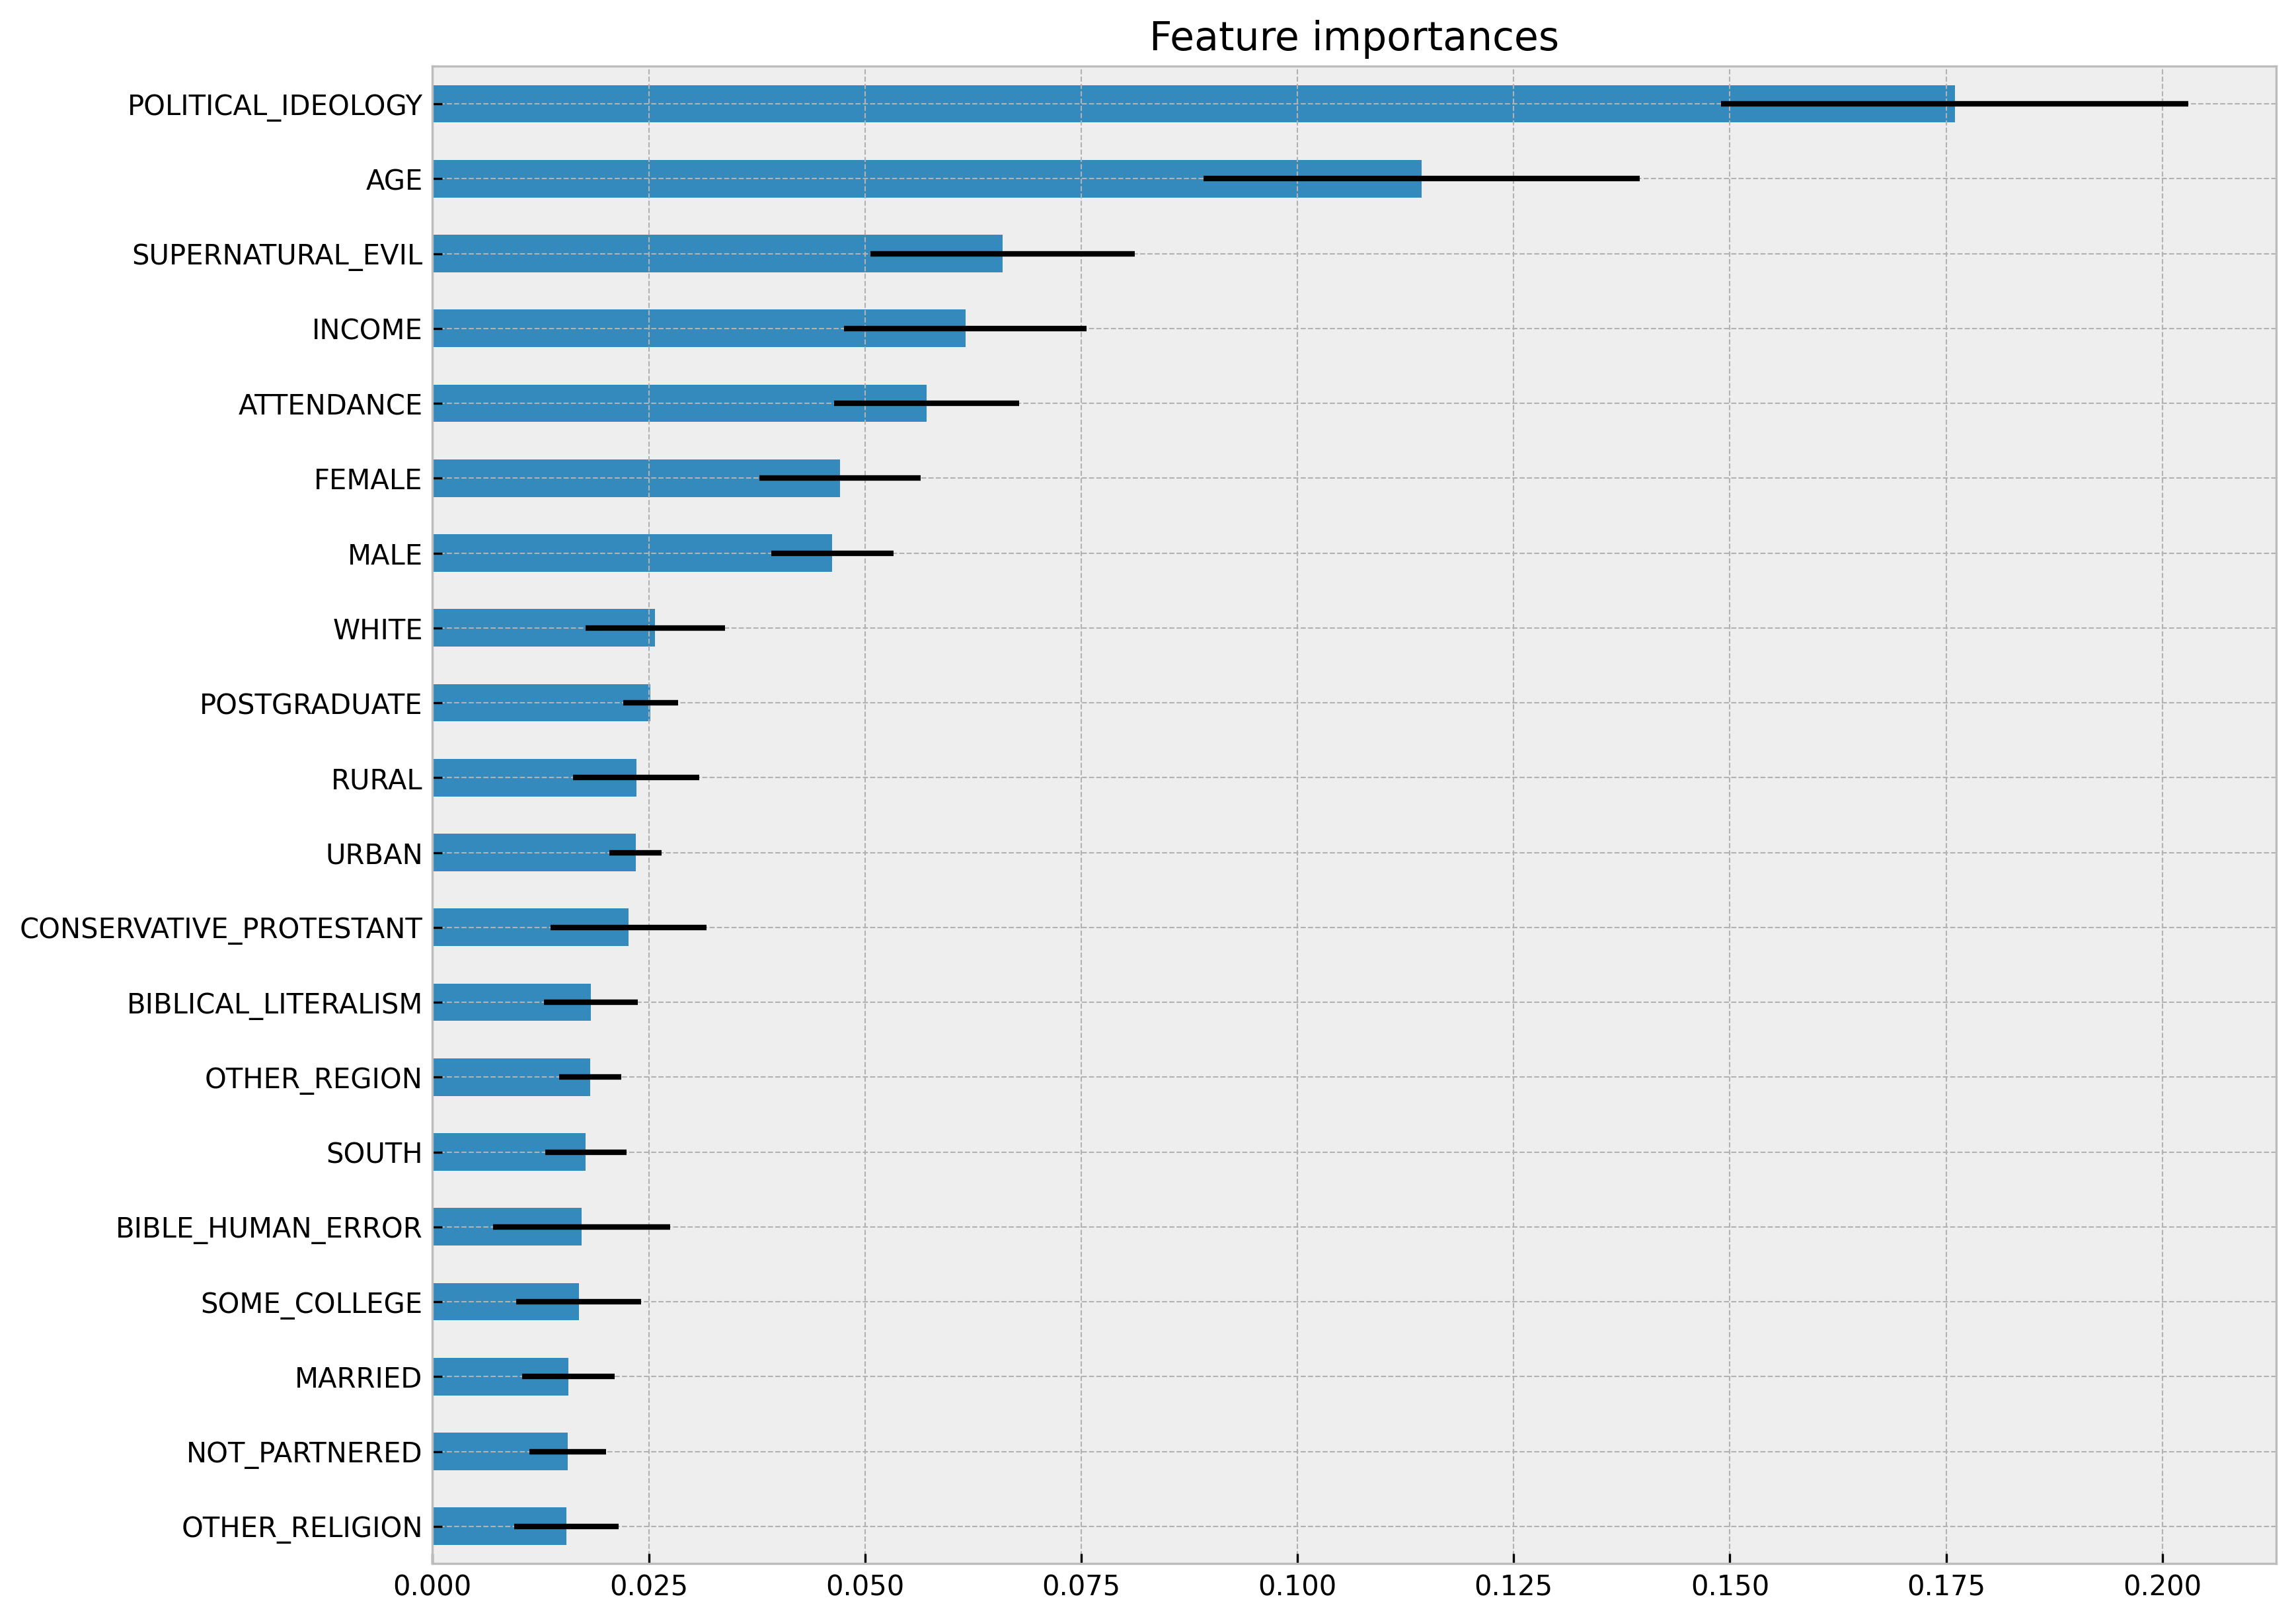

In [50]:
plt.style.use("bmh")
# setting the dpi for a higher resolution image
plt.figure(figsize=(12, 10), dpi=300)
plt.title("Feature importances")
pltdf = pd.DataFrame({"Feature": top_feature_importances.index, 
                      "Importance": top_feature_importances.MEAN})
pltdf.plot.barh(ax = plt.gca(), 
               xerr=top_feature_importances.STD,
               legend=None)
plt.gca().invert_yaxis()
plt.show()

From the above graph, we can see that again, an individual's political ideology (importance $=17.6\%$) (conservative/liberal) is a very important feature for predicting their attitude towards different gun policies. Political ideology therefore is a key feature for both our regression models and our decision trees.

Age follows, with an average importance of $11.5\%$. Age was also find to play an important role in the regression models (q3 & q4) but its effect was less intense compared to other parameters such as gender and belief in supernatural evil.

Far behind, we can spot the SUPERNATURAL_EVIL, INCOME and ATTENDANCE parameters, while the FEMALE and MALE parameters are further behind. Compared to the regression models, the gender is less important. It also has lower importance compared to the superatural evil variables. **Belief in supernatural evil is far less important compared to the Political Ideology and Age parameters**.

Finally, having a colege degree seems to be of little importance when predicting attitude towards firearm use, but having a postgraduate degree seems to have a more significant role, but still of minor importance compared to the aforementioned parameters.

---
To conclude, we can see that, although not always necessary, there were many similarities between the variables found to play an important role in our regression models and our random forest with bagging classifier parameters. 

Using two different approaches, we concluded that from the variables examined, an individual's political ideology is the stongest predictor of their attitude towards guns.

Belief in supernatural evil, although not the most important factor, was found to also be a be a decent predictor of the attitude towards firerarms.

Finally, the gender was not as important as described in the relevant [Economist article](https://www.economist.com/united-states/2021/11/06/belief-in-supernatural-evil-is-a-strong-predictor-of-pro-gun-beliefs).